# Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import Accident Data

Source: https://www.kaggle.com/sobhanmoosavi/us-accidents/data

In [2]:
filepath = "US_Accidents_June20.csv"
df = pd.read_csv(filepath, low_memory=False)

df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


# Find Null Values

In [3]:
count_nan_in_df = df.isnull().sum()
#print (count_nan_in_df)
count_nan_in_df

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

## Seaborn Visualization on Columns with Null Values

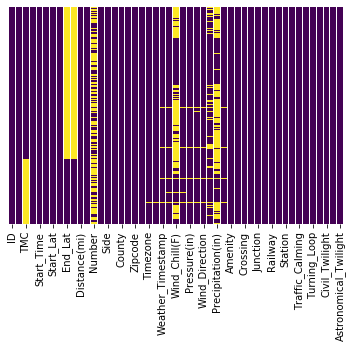

In [3]:
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

# Convert Date Columns to Date Type

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%dT%H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%dT%H:%M:%S')

In [5]:
df['Start_Time'].max()

Timestamp('2020-06-30 23:18:09')

In [6]:
df['Start_Time'].min()

Timestamp('2016-02-08 00:37:08')

## Confirm Time Range of Data

# Create New Dataframe with a Subset of Columns

In [7]:
new_df = df[['Severity','Start_Time','Start_Lat', 'Start_Lng','Street','City','State', 'Zipcode']].copy()
new_df.head(5)

,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,State,Zipcode
0,3,2016-02-08 05:46:00,39.865147,-84.058723,I-70 E,Dayton,OH,45424
1,2,2016-02-08 06:07:59,39.928059,-82.831184,Brice Rd,Reynoldsburg,OH,43068-3402
2,2,2016-02-08 06:49:27,39.063148,-84.032608,State Route 32,Williamsburg,OH,45176
3,3,2016-02-08 07:23:34,39.747753,-84.205582,I-75 S,Dayton,OH,45417
4,2,2016-02-08 07:39:07,39.627781,-84.188354,Miamisburg Centerville Rd,Dayton,OH,45459


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Severity    int64         
 1   Start_Time  datetime64[ns]
 2   Start_Lat   float64       
 3   Start_Lng   float64       
 4   Street      object        
 5   City        object        
 6   State       object        
 7   Zipcode     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 214.5+ MB


In [9]:
new_df.describe()

,Severity,Start_Lat,Start_Lng
count,3.513617e+06,3.513617e+06,3.513617e+06
mean,2.339929e+00,3.654195e+01,-9.579151e+01
std,5.521935e-01,4.883520e+00,1.736877e+01
min,1.000000e+00,2.455527e+01,-1.246238e+02
25%,2.000000e+00,3.363784e+01,-1.174418e+02
50%,2.000000e+00,3.591687e+01,-9.102601e+01
75%,3.000000e+00,4.032217e+01,-8.093299e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01


# Filter for Data over the most recent 6 months

In [10]:
mask = new_df['Start_Time'] > '2020-03-01 00:00:00'

In [11]:
last_4_df = new_df.loc[mask]
last_4_df.sort_values('Start_Time', ascending=False, inplace=True)
last_4_df.reset_index(drop=True, inplace=True)
last_4_df.tail(5)

/home/bdr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,State,Zipcode
361464,2,2020-03-01 00:09:00,40.589846,-122.460812,Eureka Way,Redding,CA,96001
361465,2,2020-03-01 00:07:00,38.588726,-122.607046,Tubbs Ln,Calistoga,CA,94515-1055
361466,2,2020-03-01 00:05:00,37.332477,-122.017696,I-280 N,Cupertino,CA,95014
361467,2,2020-03-01 00:04:00,32.715204,-117.124173,CA-94 E,San Diego,CA,92102
361468,2,2020-03-01 00:01:00,36.928328,-120.838127,I-5 N,Firebaugh,CA,93622


# Export to CSV

In [12]:
last_4_df.to_csv(r'Leaflet Viz/static/data/last_4_months.csv')

# Export to HTML

In [13]:
last_4_df.to_html(r'Leaflet Viz/static/data/last_4_months.html')

# Randomly Sample DataSet (10% of Values)

In [14]:
# sample_df = new_df.sample(n=351361, replace='False')
# sample_df.head(5)

In [15]:
# sample_df.to_csv(r'Leaflet Viz/static/data/sample_10_percent.csv')